In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [2]:
NPGO=np.array([0.416655983,1.406427404,0.410149171,1.242465357,0.832926488,1.356314911,0.122457003,\
               -0.132940854,-1.315864758,-0.030001073,-0.570698404,-1.901666667,-2.188857716,-1.558333333])

In [3]:
NPGO.shape

(14,)

In [4]:
## 0-10 m Nitrate Anomalies (data from CentralSoG_0-10mNitrate_Data.ipynb)
AnnualNitrateAnom=np.array([0.8633608938554307,
 0.7630108436844782,
 1.2451782089078218,
 1.0993911379231278,
 1.0778952268071027,
 0.7930766638242712,
 0.09068034026870464,
 -1.0047901062258173,
 -0.5580840314248192,
 -0.24314912715888504,
 -0.8402407670108243,
 -1.4125582762365223,
 -1.0574773870156875,
 -0.8162936201983921])


In [5]:
## summer here is May to July = critical period for juvenile salmon
## Data from Figure5_PhytoplanktonBiomass.ipynb

SummerDiatomAnom=np.array([1.9598996241167672,
 7.4625711699147,
 6.159889005771577,
 7.264130203451437,
 1.4306089628016672,
 0.024769965498872892,
 0.8760471071439273,
 -6.038132348520801,
 1.5713718128232195,
 -3.7136811476676748,
 -3.6333247217133477,
 -4.0758041013055255,
 -3.841541964752853,
 -5.446803567561965])

In [6]:
## Data from HRDPSWinds_Data.ipynb

AnnualWindAnom=np.array([0.5624350840911205, 0.611054585609601, 0.5629420342383451, 0.8028133772152328, 0.3667445244727201, 0.008051083717511176, -0.47596692419671394, -0.3788445873177926, -0.27978753424310066, -0.08895952877028179, -0.5413632330956397, -0.5355524954857764, -0.4589110948306656, -0.1546552914045587])

In [7]:
### Data from CentralSoG_SST_Data.ipynb

AnnualSSTAnom=np.array([-0.1986791152944143,
 -0.547080391297353,
 -0.270685783754379,
 0.008650449368440505,
 -0.32972181796149513,
 -0.35178747288286516,
 -0.025715012606125853,
 0.47586477879896094,
 0.38960436582924274,
 0.12451578946342678,
 -0.07001688192067057,
 0.45714218208970614,
 0.13674357413144733,
 0.20116533603605546])

In [8]:
### Data from Figure10_ZooplanktonGrazing.ipynb

ZoopSummerGrazRatioAnom=([0.16323516486652323,
 1.1300120414958927,
 0.6055319653910004,
 0.6762936972982682,
 -0.035361505372499824,
 0.4213344283047168,
 -0.11933140359706074,
 -0.5950012168890954,
 -0.011826657050801215,
 -0.4285915528771111,
 -0.4000840370037163,
 -0.4528955976250769,
 -0.4445251905573931,
 -0.508790136383646])

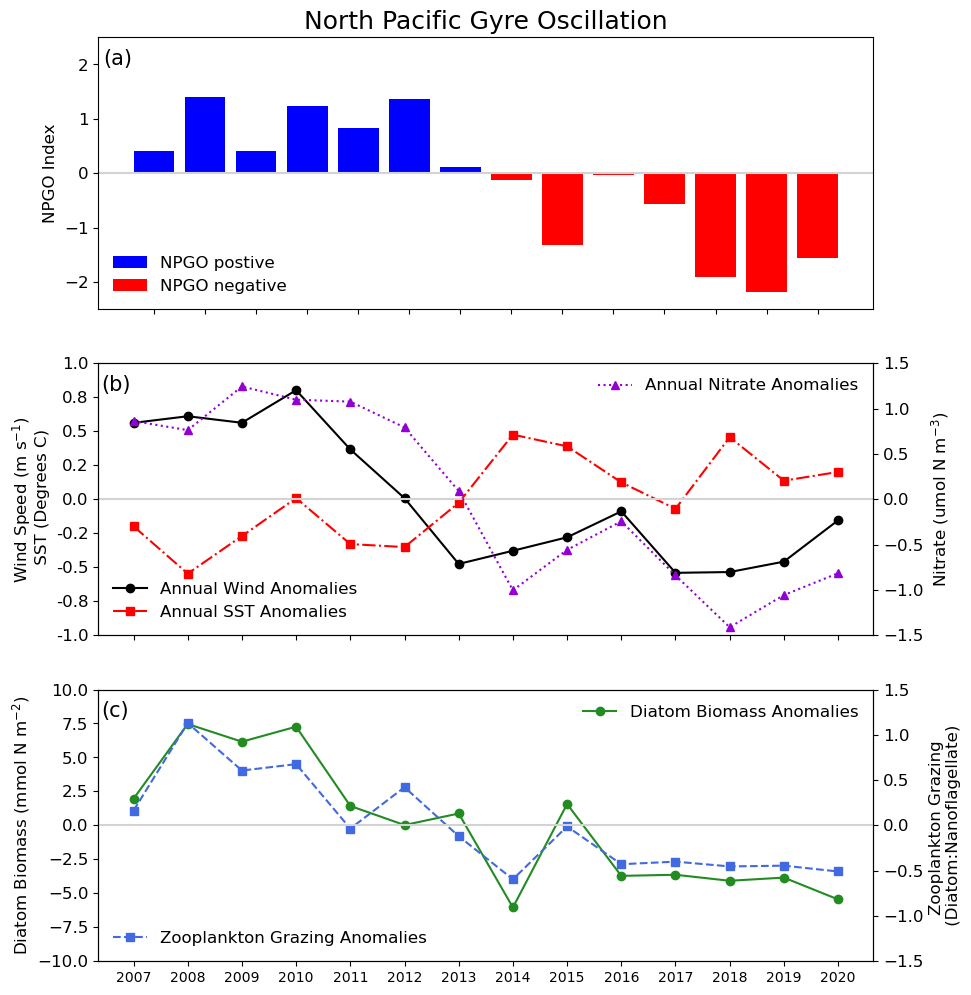

In [9]:
fig, ax = plt.subplots(3,1,figsize=(10, 12))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
xticks1=['2007','2008','2009','2010','2011','2012','2013']
xticks2=['2014','2015','2016','2017','2018','2019','2020']


ax[0].bar(xticks1, NPGO[0:7],label='NPGO postive',color='blue')
ax[0].bar(xticks2, NPGO[7:14],label='NPGO negative',color='red')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')
#ax.bar(x,y,color='k')
ax[0].set_title('North Pacific Gyre Oscillation',fontsize=18)  #(with 2015)
ax[0].legend(frameon=False,loc=3,fontsize=12)
ax[0].set_ylim(-2.5,2.5)
ax[0].set_ylabel('NPGO Index',fontsize=12)
ax[0].axhline(y=0,color='lightgrey',linestyle='-')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].set_xticklabels([])
ax[0].text(-1, 2, '(a)', fontsize=15,  color='k')


ax2 = ax[1].twinx()

ax[1].plot(xticks, AnnualWindAnom,marker='o',label='Annual Wind Anomalies',color='k')
ax2.plot(xticks, AnnualNitrateAnom,marker='^',linestyle=':',label='Annual Nitrate Anomalies',color='darkviolet')
ax[1].plot(xticks, AnnualSSTAnom,marker='s',linestyle='-.',label='Annual SST Anomalies',color='red')
#ax.bar(x,y,color='k')
ax[1].set_title('',fontsize=18)  #(with 2015)
ax[1].legend(frameon=False,loc=3,fontsize=12)
ax2.legend(frameon=False,loc=1,fontsize=12)
ax[1].set_ylim(-1,1)
ax2.set_ylim(-1.5,1.5)
ax[1].set_ylabel('Wind Speed (m s$^{-1}$)\n SST (Degrees C)',fontsize=12)
ax2.set_ylabel('Nitrate (umol N m$^{-3}$)',fontsize=12)
ax[1].axhline(y=0,color='lightgrey',linestyle='-')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_tick_params(labelsize=12)
ax[1].set_xticklabels([])
ax[1].text(-.6, .8, '(b)', fontsize=15,  color='k')

ax3 = ax[2].twinx()

ax3.plot(xticks, ZoopSummerGrazRatioAnom,marker='s',linestyle='--',label='Zooplankton Grazing Anomalies',color='royalblue')
#ax1.plot(xticks, MicroZoopSummerGrazRatioAnom,marker='s',linestyle='-.',label='Zooplankton Biomass Anomalies',color='royalblue')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')
ax[2].plot(xticks, SummerDiatomAnom,marker='o',linestyle='-',label='Diatom Biomass Anomalies',color='forestgreen')

#ax.bar(x,y,color='k')

ax3.set_title('',fontsize=18)  #(with 2015)
ax3.legend(frameon=False,loc=3,fontsize=12)
ax[2].legend(frameon=False,loc=1,fontsize=12)
ax3.set_ylim(-1.5,1.5)
ax[2].set_ylim(-10,10)
ax3.set_ylabel('Zooplankton Grazing \n (Diatom:Nanoflagellate) ',fontsize=12)
ax[2].set_ylabel('Diatom Biomass (mmol N m$^{-2}$)',fontsize=12)
ax3.axhline(y=0,color='lightgrey',linestyle='-')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)
ax[2].yaxis.set_tick_params(labelsize=12)
#ax[2].set_xticklabels([])
ax3.text(-.6, 1.2, '(c)', fontsize=15,  color='k')

#plt.savefig('Figure11_Summary.png', bbox_inches='tight',dpi=1000,transparent=False)